## k-Nearest Neighbors

KNN falls into the supervised learning algorithms category. Informally, this means that we are given a labelled dataset consisting of training observations (x,y) and would like to capture the relationship between x and y.  More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

KNNs are also non-parametric and instance-based learning algorithm.  So, no explicit assumptions about the functional form of h, and it chooses to memorize the training instances which are subsequently used as "knowledge" for the prediction phase.

What this simple algorithm, KNN, requires:
    1.  Some notion of distance.
    2. An assumption that data points that are close to one another are similar.
    

### Decision Boundary and Bias / Variance Tradeoff

 K in KNN is a hyperparameter that you, as a designer, must pick in order to get the best possible fit for the data set. Intuitively, you can think of K as controlling the shape of the decision boundary. A small value for K provides the most flexible fit, which will have low bias but high variance. Graphically, our decision boundary will be more jagged.  On the other hand, a higher K averages more voters in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries which means lower variance but increased bias.

One thing to consider is that if your model has high bias (which means that it performs poorly even on your training data) then one thing to try is adding more features.  If your model has high variance, then you can try removing features.  Or you can try and add more quality data.

### Example K-Nearest Neighbors (KNN) and ISLR Caravan Insurance Dataset

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier  # Import the KNN algorithm from sklearn.

In [2]:
insure1 = pd.read_csv('/Users/alicevnix/Desktop/Caravan.csv')


In [3]:
insure1.shape


(5822, 87)

In [4]:
insure1.columns


Index(['Unnamed: 0', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZI

In [5]:
insure1.describe()


,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2911.500000,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,1680.810965,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1456.250000,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2911.500000,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4366.750000,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5822.000000,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [6]:
insure1["Purchase"].value_counts()


No     5474
Yes     348
Name: Purchase, dtype: int64

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The scale() function from the preprocessing submodule of SkLearn does just this. In standardizing the data, we exclude column 86, because that is the qualitative Purchase variable.

In [7]:
insure1.dtypes

Unnamed: 0     int64
MOSTYPE        int64
MAANTHUI       int64
MGEMOMV        int64
MGEMLEEF       int64
MOSHOOFD       int64
MGODRK         int64
MGODPR         int64
MGODOV         int64
MGODGE         int64
MRELGE         int64
MRELSA         int64
MRELOV         int64
MFALLEEN       int64
MFGEKIND       int64
MFWEKIND       int64
MOPLHOOG       int64
MOPLMIDD       int64
MOPLLAAG       int64
MBERHOOG       int64
MBERZELF       int64
MBERBOER       int64
MBERMIDD       int64
MBERARBG       int64
MBERARBO       int64
MSKA           int64
MSKB1          int64
MSKB2          int64
MSKC           int64
MSKD           int64
               ...  
PGEZONG        int64
PWAOREG        int64
PBRAND         int64
PZEILPL        int64
PPLEZIER       int64
PFIETS         int64
PINBOED        int64
PBYSTAND       int64
AWAPART        int64
AWABEDR        int64
AWALAND        int64
APERSAUT       int64
ABESAUT        int64
AMOTSCO        int64
AVRAAUT        int64
AAANHANG       int64
ATRACTOR     

In [8]:
from sklearn import preprocessing

y = insure1.Purchase
X = insure1.drop('Purchase', axis=1).astype('float64')
X_scaled = preprocessing.scale(X)


Now every column of X_scaled has a standard deviation of one and a mean of zero.

Note - can also use sklearn's StandardScaler 

We'll now split the observations into a test set, containing the first 1,000 rows or observations, and a training set, containing the remaining observations.

In [9]:
X_train = X_scaled[1000:,:]
y_train = y[1000:]

X_test = X_scaled[:1000,:]
y_test = y[:1000]


In [10]:
print(len(X_train), "train +", len(X_test), "test")



4822 train + 1000 test


In [11]:
from sklearn.neighbors import KNeighborsClassifier  # Import the KNN algorithm from sk-learn.

model = KNeighborsClassifier(n_neighbors=1) # init kNN, with k=1
model.fit(X_train,y_train)
model.score(X_train,y_train)



1.0

In [12]:
model = KNeighborsClassifier(n_neighbors=5) # init kNN, with k=5
model.fit(X_train,y_train)
model.score(X_train,y_train)


0.94214019079220246

In [13]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report

Let's fit a KNN model on the training data using  K=1 , and evaluate its performance on the test data.

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))


             precision    recall  f1-score   support

         No      0.948     0.937     0.943       941
        Yes      0.157     0.186     0.171        59

avg / total      0.902     0.893     0.897      1000



In [15]:
print(confusion_matrix(y_test, pred).T)


[[882  48]
 [ 59  11]]


In [16]:
11/(59+11)


0.15714285714285714

Among x such customers, 15.7 %, actually do purchase insurance. 

Let's try it when we set K=5 this time.

In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))


             precision    recall  f1-score   support

         No      0.944     0.993     0.968       941
        Yes      0.364     0.068     0.114        59

avg / total      0.910     0.938     0.918      1000



In [19]:
print(confusion_matrix(y_test, pred).T)


[[934  55]
 [  7   4]]


In [20]:
4/11

0.36363636363636365

In [21]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
pred = knn.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))


             precision    recall  f1-score   support

         No      0.942     0.997     0.969       941
        Yes      0.250     0.017     0.032        59

avg / total      0.901     0.939     0.913      1000



In [22]:
print(confusion_matrix(y_test, pred).T)


[[938  58]
 [  3   1]]


In [23]:
1/4

0.25

### Example K-Nearest Neighbors (KNN) and Iris Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals. Our goal is to train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

In [1]:
import pandas as pd
import seaborn as sns

column_headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data = sns.load_dataset("iris")


In [2]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Number of rows or observations in dataset
len(data)


150

In [35]:
# How many features or columns 
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:
data.species.value_counts()


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

We have three kinds of irises, and 50 samples of each: 'virginica', 'setosa', and 'versicolor'.

### Explore and Visualize Dataset

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

matplotlib.rc('font', family='Arial')


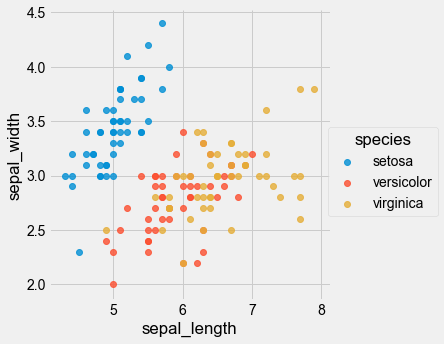

In [9]:
sns.lmplot('sepal_length', 'sepal_width', data=data, hue='species', fit_reg=False)
plt.show()


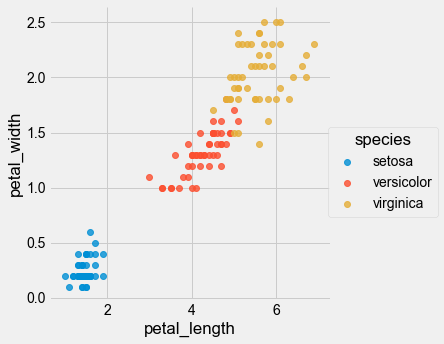

In [10]:
sns.lmplot('petal_length', 'petal_width', data=data, hue='species', fit_reg=False)
plt.show()


A quick study of the above graphs reveals some strong classification criterion. We observe that setosas have small petals, versicolor have medium sized petals and virginica have the largest petals. Also, it appears that setosas seem to have shorter and wider sepals than the other two classes.

### Train, Test, Split

In [4]:
# We will use Sklearn module to train a KNN classifier and evaluate its performance on the data

import numpy as np
from sklearn.model_selection import train_test_split



# Preprocess the data by making numpy arrays

X = np.array(data.iloc[:, 0:4])
y = np.array(data['species'])

# Split into train and test
# Divide the test set into thirds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [47]:
X_train.shape

(100, 4)

In [48]:
X_test.shape

(50, 4)

### Apply KNN

In [5]:
# Define our classifer, in this case KNN
# Fit it to our training data and evaluate its accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Instantiate learning model (k = 3), this is an arbitrary value chosen for K
# Will use cross validation later to find its optimal value

knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model

knn.fit(X_train, y_train)

# Predict the response

pred = knn.predict(X_test)

# Evaluate accuracy

print (accuracy_score(y_test, pred))



0.98


98% accuracy achieved.

### k-Folds Cross-Validation 

Now, we want to explore a method called cross validation that can be used to tune the hyperparameter K.  The best K is the one that corresponds to the lowest test error rate, or highest accuracy.  Using cross validation is important since using only the training set and test set over and over will cause overfitting and thus make our model incapable of generalizing to newer observations.  We do not want to mess with the test set until the very end of our pipeline!

K-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.



### Preprocessing Data

In [8]:
# Preprocess the data by standardizing it using StandardScaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
pd.DataFrame(ss.fit_transform(X))


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [46]:
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train, y_train)
print ("Accuracy on training set", model.score(X_train, y_train))
print ("Accuracy on test set:   ", model.score(X_test, y_test))


Accuracy on training set 0.96
Accuracy on test set:    0.98


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold

cv = KFold(len(X), n_folds=10, shuffle = True)
cross_val_score(knn, X, y, cv=cv)  # Use 10 different validation sets


array([ 0.93333333,  0.93333333,  0.93333333,  1.        ,  0.93333333,
        1.        ,  1.        ,  0.86666667,  1.        ,  1.        ])

In [12]:
cross_val_score(knn, X, y, cv=10).mean() #Average cv score


0.94000000000000006

This did not change our score by much compared to just looking at the split data set (train, test) without cv

Let's compute the cross-validated accuracy for KNN for different Ks.  Remember, K can’t be arbitrarily large since we can’t have more neighbors than the number of observations in the training data set.

kNN avg cross-validated accuracy (k=1): 0.960
kNN avg cross-validated accuracy (k=2): 0.953
kNN avg cross-validated accuracy (k=3): 0.967
kNN avg cross-validated accuracy (k=4): 0.967
kNN avg cross-validated accuracy (k=5): 0.967
kNN avg cross-validated accuracy (k=6): 0.967
kNN avg cross-validated accuracy (k=7): 0.967
kNN avg cross-validated accuracy (k=8): 0.967
kNN avg cross-validated accuracy (k=9): 0.973
kNN avg cross-validated accuracy (k=10): 0.967
kNN avg cross-validated accuracy (k=11): 0.967
kNN avg cross-validated accuracy (k=12): 0.973
kNN avg cross-validated accuracy (k=13): 0.980
kNN avg cross-validated accuracy (k=14): 0.973
kNN avg cross-validated accuracy (k=15): 0.973
kNN avg cross-validated accuracy (k=16): 0.973
kNN avg cross-validated accuracy (k=17): 0.973
kNN avg cross-validated accuracy (k=18): 0.980
kNN avg cross-validated accuracy (k=19): 0.973
kNN avg cross-validated accuracy (k=20): 0.980
kNN avg cross-validated accuracy (k=21): 0.967
kNN avg cross-validate

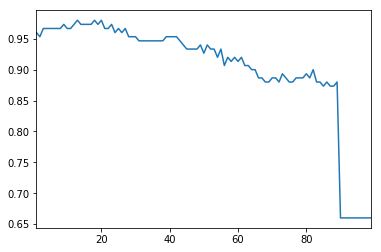

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

out = {}
for k in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=k)
    print ("kNN avg cross-validated accuracy (k=%d): %5.3f" %(k, cross_val_score(model, X, y, cv=10).mean()))
    out[k] = cross_val_score(model, X, y, cv=10).mean()
    
out = pd.Series(out)
out.plot()
